In [18]:
# Import Package

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import API Key

from Lib.client_api import CLIENT_ID, CLIENT_SECRET

In [3]:
# Authtication

auth_manager = SpotifyClientCredentials(
    client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)


# Definde Artists

In [4]:
artist = ['Brent Faiyaz', 'Natanael Cano', 'Taylor Swift', 'Harry Styles', 'Post Malone', 'Fuerza Regida', 'SZA', 'Beyoncé', 'NewJeans', 'OneRepublic']
print(artist)

['Brent Faiyaz', 'Natanael Cano', 'Taylor Swift', 'Harry Styles', 'Post Malone', 'Fuerza Regida', 'SZA', 'Beyoncé', 'NewJeans', 'OneRepublic']


# Define Atributes

In [5]:
def get_features(tr_id):
    meta = sp.track(tr_id)
    features = sp.audio_features(tr_id)

    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']

    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [name, album, artist, release_date, length, popularity, acousticness, danceability,
             energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]

    return track


# Get Data From Spotify

In [6]:
def get_songs():
    tracks = []
    for i in artist:
        song = sp.search(i, type='track', limit=50)
        for j in range(50):
            tr_id = song['tracks']['items'][j]['id']
            track = get_features(tr_id)
            tracks.append(track)
    df = pd.DataFrame(tracks, columns=['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness',
                      'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
    
    return df


In [7]:
df = get_songs()

In [8]:
df2 = df.drop_duplicates()

In [9]:
df2

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,ALL MINE,WASTELAND,Brent Faiyaz,2022-07-08,216062,80,0.4280,0.617,0.378,0.000092,0.110,-8.540,0.0315,141.967,4
1,JACKIE BROWN,WASTELAND,Brent Faiyaz,2022-07-08,169013,78,0.6500,0.726,0.353,0.002000,0.224,-10.273,0.1050,137.660,4
2,Rehab (Winter In Paris),Fuck The World,Brent Faiyaz,2020-02-07,180303,73,0.8090,0.549,0.242,0.000081,0.127,-11.692,0.0380,144.211,4
3,Clouded,Fuck The World,Brent Faiyaz,2020-02-07,110128,79,0.7740,0.583,0.344,0.000000,0.143,-8.765,0.0559,65.203,3
4,Language,Language,Paperboy Fabe,2017-05-12,150360,70,0.0422,0.620,0.721,0.007500,0.563,-5.538,0.0887,169.904,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Rescue Me,Rescue Me,OneRepublic,2019-05-17,158899,68,0.1560,0.759,0.605,0.000000,0.694,-7.737,0.0433,121.049,4
496,Somebody To Love,Human (Deluxe),OneRepublic,2021-08-27,181408,49,0.0158,0.401,0.503,0.000000,0.134,-8.084,0.0439,118.486,4
497,Bones (feat. OneRepublic) - B-Sights Remix,Bones (feat. OneRepublic) [Remixes],Galantis,2019-04-26,175420,23,0.1790,0.522,0.780,0.000000,0.110,-3.888,0.0607,118.101,4
498,Preacher,Native,OneRepublic,2014-01-01,247986,40,0.1060,0.479,0.708,0.000000,0.736,-4.393,0.0275,140.032,4


# EDA

In [16]:
df2.sort_values(by=['popularity'], ascending=False)[['name','artist']].head(10)

,name,artist
300,Kill Bill,SZA
400,OMG,NewJeans
301,Kill Bill,SZA
100,Anti-Hero,Taylor Swift
450,I Ain't Worried,OneRepublic
401,Ditto,NewJeans
302,Snooze,SZA
150,As It Was,Harry Styles
50,AMG,Natanael Cano
51,PRC,Peso Pluma


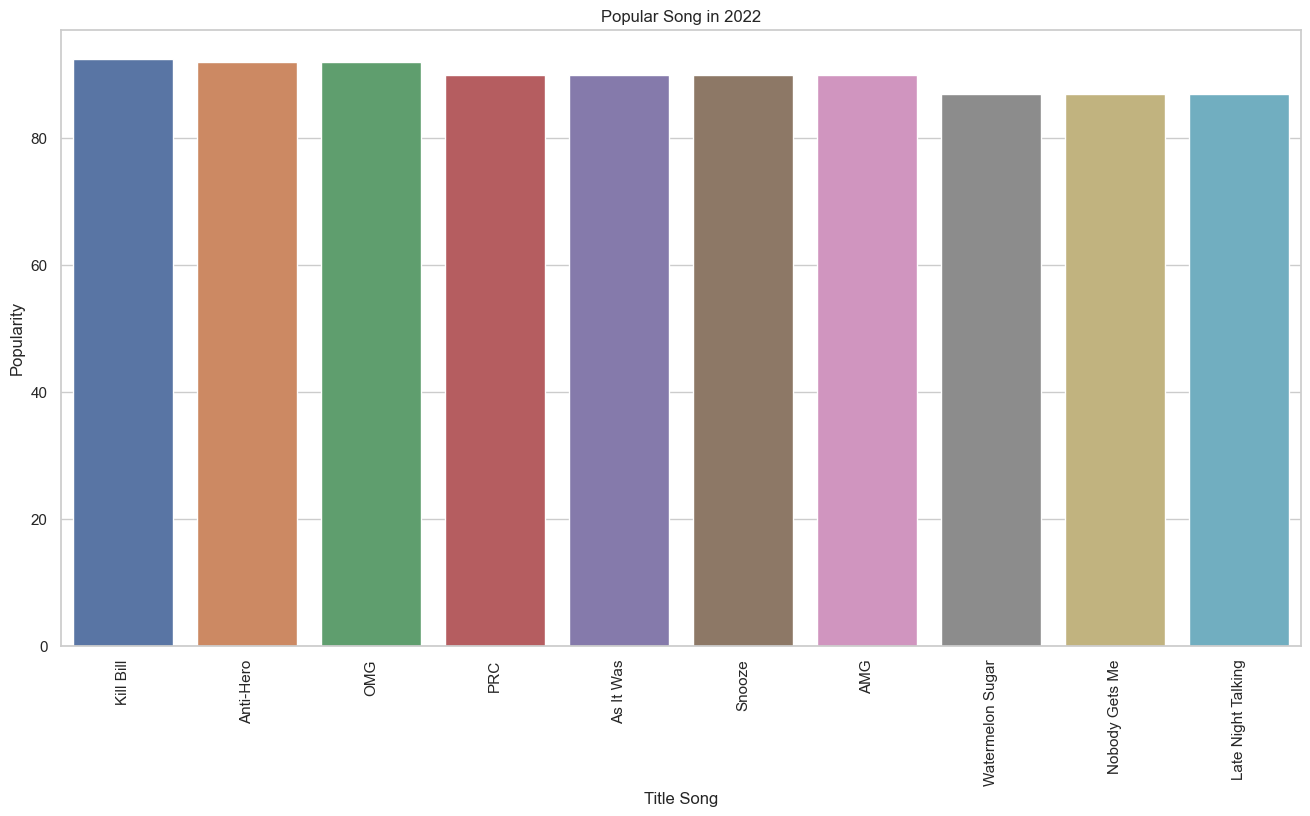

In [26]:
# Popular Songs

plt.figure(figsize=(16,8))
sns.set(style="whitegrid")

x = df.groupby("name")["popularity"].mean().sort_values(ascending=False).head(10)

ax = sns.barplot(x=x.index, y=x)
ax.set_title('Popular Song in 2022')
ax.set_ylabel('Popularity')
ax.set_xlabel('Title Song')

plt.xticks(rotation=90)
plt.show()

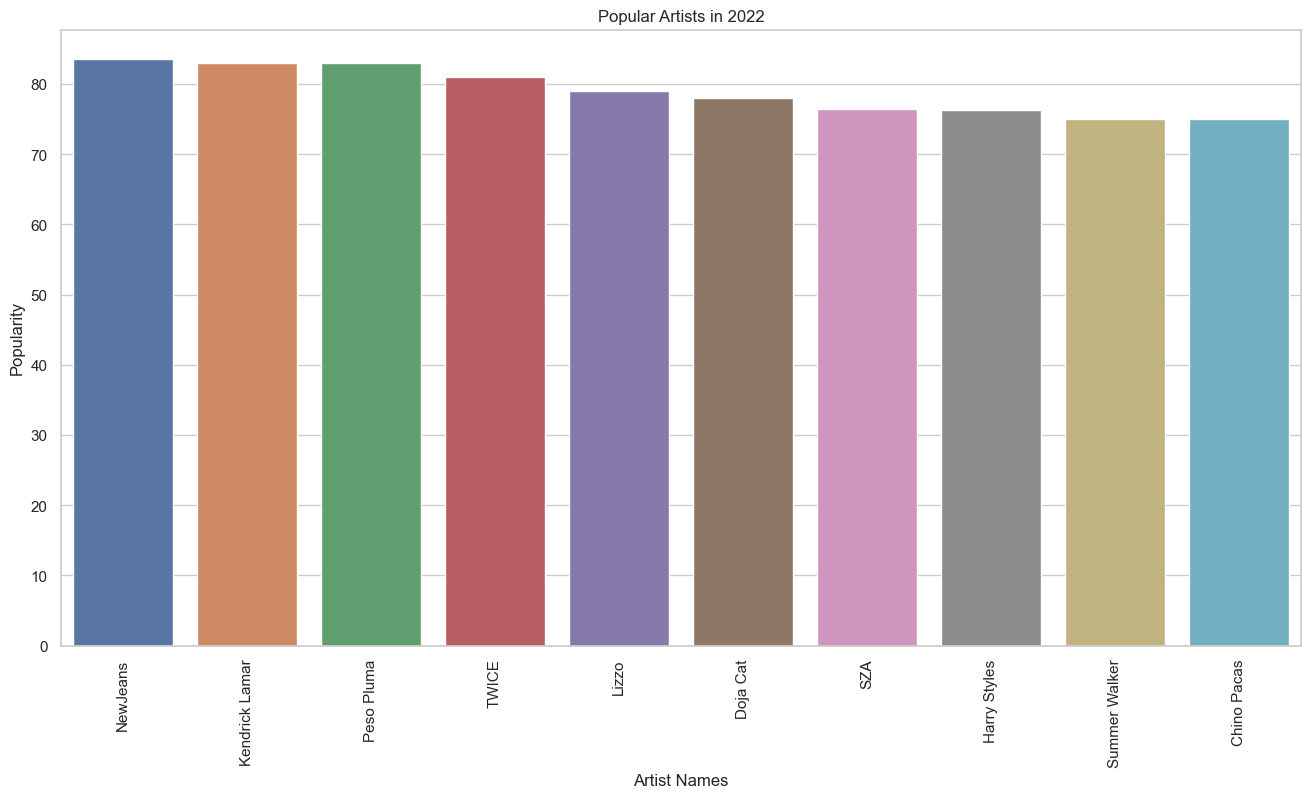

In [33]:
# Popular Artists

plt.figure(figsize=(16,8))
sns.set(style="whitegrid")

x = df.groupby("artist")["popularity"].mean().sort_values(ascending=False).head(10)

ax = sns.barplot(x=x.index, y=x)
ax.set_title('Popular Artists in 2022')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artist Names')

plt.xticks(rotation=90)
plt.show()

<Figure size 1600x800 with 0 Axes>

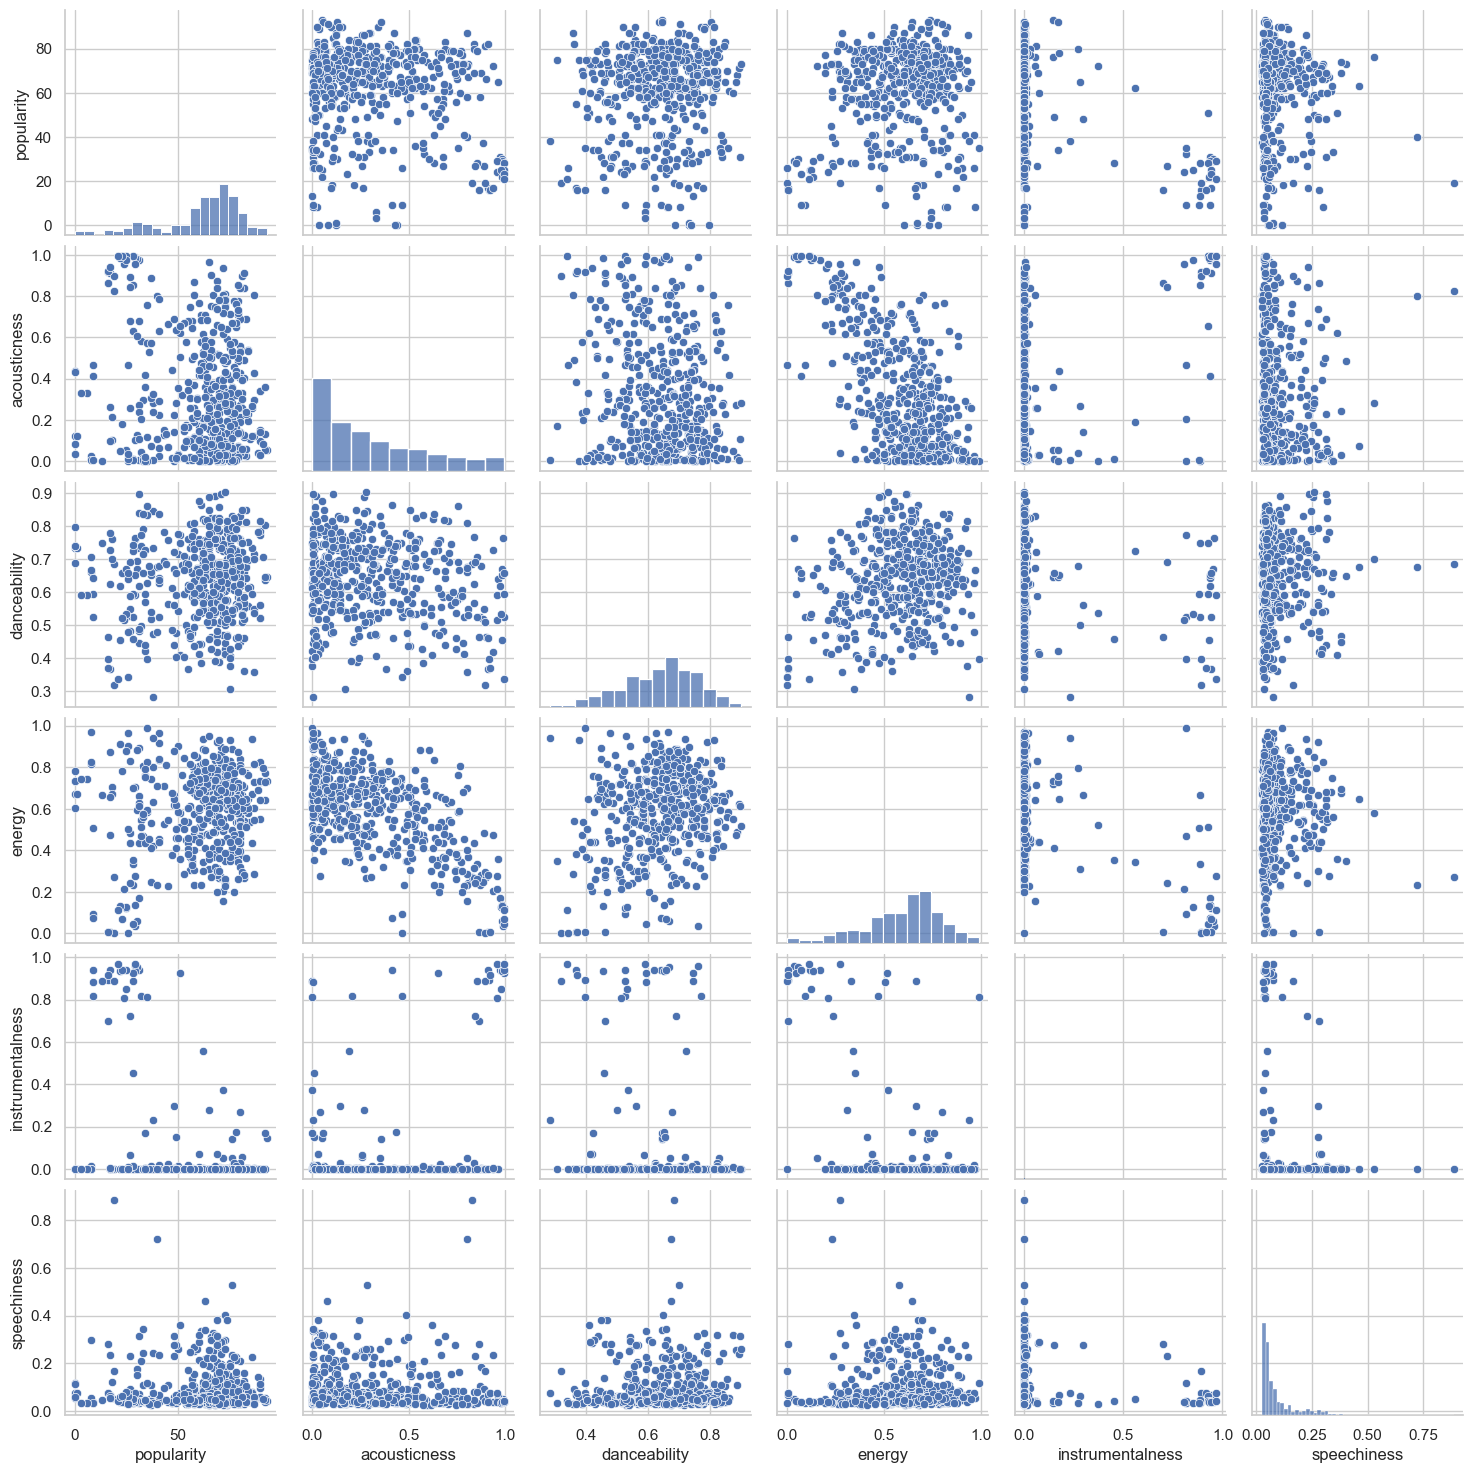

In [29]:
# Viz Plot

plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
cols = ["popularity", "acousticness", "danceability", "energy", "instrumentalness", "speechiness"]
sns.pairplot(df2[cols], height=2.5)
plt.show()

C:\Users\fshur\AppData\Local\Temp\ipykernel_10128\855949899.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


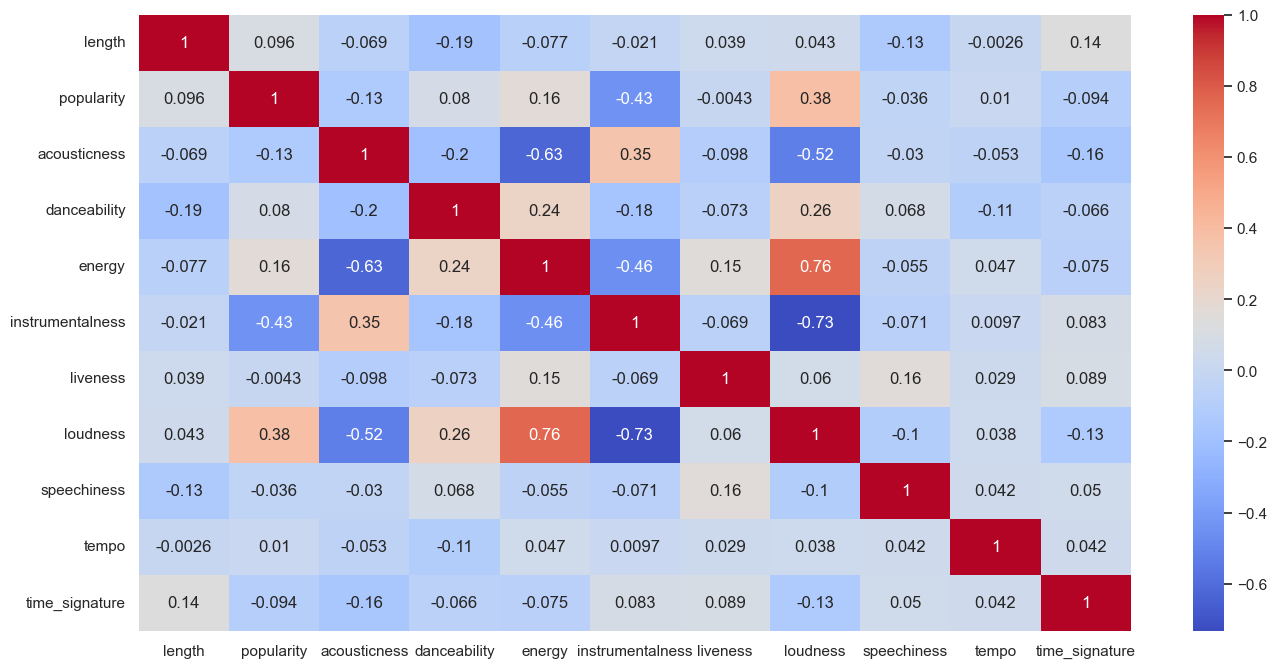

In [36]:
# Viz Heatmap

plt.figure(figsize=(16,8))
sns.set(style="whitegrid")
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()